# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.31 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


In [5]:
import numpy as np
actions = np.zeros((3, 2))

print(actions)

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [8]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.55063343 -1.5        -0.          0.
  6.83172083  5.94114017 -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [ ]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

#### ① Env. and Agent Setting

In [1]:
!pip -q install ./python

from unityagents import UnityEnvironment
import numpy as np
import torch

from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

from maddpg_agent import Agent

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.31 which is incompatible.
jupyter-console 6.4.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 5.2.4 which is incompatible.


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24


#### ② Train the Agent with MADDPG

In [2]:
def maddpg(n_episodes=3000, max_t=3000, print_every=10, consecutive_episodes_num = 100, target_score = 0.5):
    
    scores_deque = deque(maxlen=consecutive_episodes_num)
    scores_all = []
    score_100eps = []
    best_score = 0
    best_episode = 0
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        
        states = np.reshape(env_info.vector_observations, (1,state_size * num_agents))        
        scores = np.zeros(num_agents)
        agent1.reset()
        agent2.reset()
        
        #for t in range(max_t):
        t = 0
        while True:
            action1 = agent1.act(states, add_noise=True)
            action2 = agent2.act(states, add_noise=True)
            actions = np.concatenate((action1, action2), axis=0).flatten()            
            env_info = env.step(actions)[brain_name]            
            next_states = np.reshape(env_info.vector_observations, (1,state_size * num_agents))
            rewards = env_info.rewards                        
            done = env_info.local_done                       
            
            #for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
            #    agent.step(state, action, reward, next_state, done, t)
            agent1.step(states, actions, rewards[0], next_states, done, t, 0) # agent 1 learns
            agent2.step(states, actions, rewards[1], next_states, done, t, 1) # agent 2 learns
            t += 1
            states = next_states                              # roll over states to next time step
            scores += np.max(rewards)                        # update the score
            
            if np.any(done) or t >= max_t:
                break
        
        winner_score = np.max(scores)
        scores_all.append(winner_score)           
        scores_deque.append(winner_score)         
        score_100eps.append(np.mean(scores_deque))   
        
        # save best score                        
        if winner_score > best_score:
            best_score = winner_score
            best_episode = i_episode
        
        torch.save(agent1.actor_local.state_dict(), 'checkpoint_actor1.pth')
        torch.save(agent1.critic_local.state_dict(), 'checkpoint_critic1.pth')
        torch.save(agent2.actor_local.state_dict(), 'checkpoint_actor2.pth')
        torch.save(agent2.critic_local.state_dict(), 'checkpoint_critic2.pth')
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAvg.Score-100 Eps: {:.3f}'.format(i_episode, score_100eps[-1]))
            
        if score_100eps[-1] > target_score:
            solved_episode = i_episode - consecutive_episodes_num
            print('the environment was solved at episode ', solved_episode)    
            break;
        elif (i_episode-best_episode) >= 2000:
                # stop training if model stops converging
                print('<-- Training stopped.')
                break
            
    return scores_all, score_100eps

#### Final Result

Episode 10	Avg.Score-100 Eps: 0.000
Episode 20	Avg.Score-100 Eps: 0.000
Episode 30	Avg.Score-100 Eps: 0.000
Episode 40	Avg.Score-100 Eps: 0.000
Episode 50	Avg.Score-100 Eps: 0.002
Episode 60	Avg.Score-100 Eps: 0.002
Episode 70	Avg.Score-100 Eps: 0.001
Episode 80	Avg.Score-100 Eps: 0.001
Episode 90	Avg.Score-100 Eps: 0.001
Episode 100	Avg.Score-100 Eps: 0.001
Episode 110	Avg.Score-100 Eps: 0.001
Episode 120	Avg.Score-100 Eps: 0.001
Episode 130	Avg.Score-100 Eps: 0.001
Episode 140	Avg.Score-100 Eps: 0.001
Episode 150	Avg.Score-100 Eps: 0.000
Episode 160	Avg.Score-100 Eps: 0.000
Episode 170	Avg.Score-100 Eps: 0.000
Episode 180	Avg.Score-100 Eps: 0.000
Episode 190	Avg.Score-100 Eps: 0.000
Episode 200	Avg.Score-100 Eps: 0.000
Episode 210	Avg.Score-100 Eps: 0.000
Episode 220	Avg.Score-100 Eps: 0.000
Episode 230	Avg.Score-100 Eps: 0.000
Episode 240	Avg.Score-100 Eps: 0.002
Episode 250	Avg.Score-100 Eps: 0.005
Episode 260	Avg.Score-100 Eps: 0.008
Episode 270	Avg.Score-100 Eps: 0.008
Episode 28

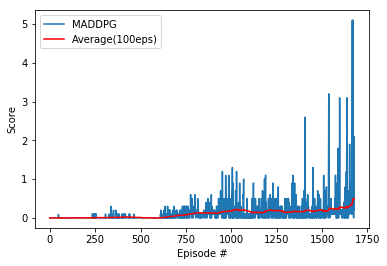

In [2]:
#Agent
agent1 = Agent(state_size, action_size, num_agents=1, random_seed=2)
agent2 = Agent(state_size, action_size, num_agents=1, random_seed=2)

scores, avg100 = maddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MADDPG')
plt.plot(np.arange(len(scores)), avg100, c='r', label='Average(100eps)')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

#### Other Tries

Episode 10	Avg.Score-100 Eps: 0.010
Episode 20	Avg.Score-100 Eps: 0.005
Episode 30	Avg.Score-100 Eps: 0.003
Episode 40	Avg.Score-100 Eps: 0.003
Episode 50	Avg.Score-100 Eps: 0.002
Episode 60	Avg.Score-100 Eps: 0.002
Episode 70	Avg.Score-100 Eps: 0.001
Episode 80	Avg.Score-100 Eps: 0.001
Episode 90	Avg.Score-100 Eps: 0.001
Episode 100	Avg.Score-100 Eps: 0.001
Episode 110	Avg.Score-100 Eps: 0.000
Episode 120	Avg.Score-100 Eps: 0.000
Episode 130	Avg.Score-100 Eps: 0.001
Episode 140	Avg.Score-100 Eps: 0.001
Episode 150	Avg.Score-100 Eps: 0.001
Episode 160	Avg.Score-100 Eps: 0.001
Episode 170	Avg.Score-100 Eps: 0.001
Episode 180	Avg.Score-100 Eps: 0.002
Episode 190	Avg.Score-100 Eps: 0.003
Episode 200	Avg.Score-100 Eps: 0.003
Episode 210	Avg.Score-100 Eps: 0.005
Episode 220	Avg.Score-100 Eps: 0.005
Episode 230	Avg.Score-100 Eps: 0.004
Episode 240	Avg.Score-100 Eps: 0.004
Episode 250	Avg.Score-100 Eps: 0.004
Episode 260	Avg.Score-100 Eps: 0.004
Episode 270	Avg.Score-100 Eps: 0.004
Episode 28

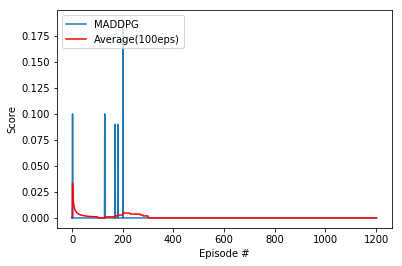

In [3]:
#Agent
agent1 = Agent(state_size, action_size, num_agents=1, random_seed=2)
agent2 = Agent(state_size, action_size, num_agents=1, random_seed=2)

scores, avg100 = maddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MADDPG')
plt.plot(np.arange(len(scores)), avg100, c='r', label='Average(100eps)')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

Episode 10	Avg.Score-100 Eps: 0.000
Episode 20	Avg.Score-100 Eps: 0.000
Episode 30	Avg.Score-100 Eps: 0.000
Episode 40	Avg.Score-100 Eps: 0.000
Episode 50	Avg.Score-100 Eps: 0.000
Episode 60	Avg.Score-100 Eps: 0.000
Episode 70	Avg.Score-100 Eps: 0.000
Episode 80	Avg.Score-100 Eps: 0.000
Episode 90	Avg.Score-100 Eps: 0.000
Episode 100	Avg.Score-100 Eps: 0.000
Episode 110	Avg.Score-100 Eps: 0.000
Episode 120	Avg.Score-100 Eps: 0.002
Episode 130	Avg.Score-100 Eps: 0.005
Episode 140	Avg.Score-100 Eps: 0.005
Episode 150	Avg.Score-100 Eps: 0.005
Episode 160	Avg.Score-100 Eps: 0.005
Episode 170	Avg.Score-100 Eps: 0.005
Episode 180	Avg.Score-100 Eps: 0.005
Episode 190	Avg.Score-100 Eps: 0.006
Episode 200	Avg.Score-100 Eps: 0.006
Episode 210	Avg.Score-100 Eps: 0.006
Episode 220	Avg.Score-100 Eps: 0.004
Episode 230	Avg.Score-100 Eps: 0.002
Episode 240	Avg.Score-100 Eps: 0.003
Episode 250	Avg.Score-100 Eps: 0.004
Episode 260	Avg.Score-100 Eps: 0.005
Episode 270	Avg.Score-100 Eps: 0.006
Episode 28

Episode 2200	Avg.Score-100 Eps: 0.316
Episode 2210	Avg.Score-100 Eps: 0.314
Episode 2220	Avg.Score-100 Eps: 0.325
Episode 2230	Avg.Score-100 Eps: 0.321
Episode 2240	Avg.Score-100 Eps: 0.321
Episode 2250	Avg.Score-100 Eps: 0.305
Episode 2260	Avg.Score-100 Eps: 0.291
Episode 2270	Avg.Score-100 Eps: 0.238
Episode 2280	Avg.Score-100 Eps: 0.283
Episode 2290	Avg.Score-100 Eps: 0.282
Episode 2300	Avg.Score-100 Eps: 0.331
Episode 2310	Avg.Score-100 Eps: 0.353
Episode 2320	Avg.Score-100 Eps: 0.378
Episode 2330	Avg.Score-100 Eps: 0.390
Episode 2340	Avg.Score-100 Eps: 0.435
Episode 2350	Avg.Score-100 Eps: 0.435
Episode 2360	Avg.Score-100 Eps: 0.442
Episode 2370	Avg.Score-100 Eps: 0.463
Episode 2380	Avg.Score-100 Eps: 0.423
Episode 2390	Avg.Score-100 Eps: 0.437
Episode 2400	Avg.Score-100 Eps: 0.386
Episode 2410	Avg.Score-100 Eps: 0.362
Episode 2420	Avg.Score-100 Eps: 0.333
Episode 2430	Avg.Score-100 Eps: 0.345
Episode 2440	Avg.Score-100 Eps: 0.304
Episode 2450	Avg.Score-100 Eps: 0.366
Episode 2460

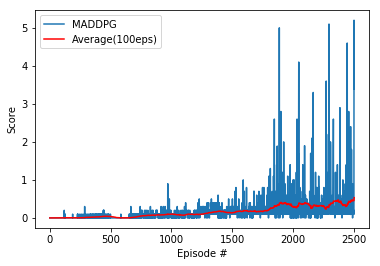

In [3]:
#Agent
agent1 = Agent(state_size, action_size, num_agents=1, random_seed=2)
agent2 = Agent(state_size, action_size, num_agents=1, random_seed=2)

scores, avg100 = maddpg()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MADDPG')
plt.plot(np.arange(len(scores)), avg100, c='r', label='Average(100eps)')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()